In [1]:
import pandas as pd
import requests
import wget
import numpy as np

In [ ]:
df = pd.read_csv('vehicles.csv')

df.head()

In [2]:
energy = pd.read_csv('global_power_plant_database.csv')
energy.head()

/var/folders/pg/zck9hy351gbfrqfqp_z4gb1m0000gn/T/ipykernel_4127/1016391085.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  energy = pd.read_csv('global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [3]:
s1 = pd.Series ([10 , 20, 30] , index =[1 ,2 ,2])
s2 = pd.Series ([35 , 44, 53] , index =[2 ,2 ,4] , name ='s2 ')

s1+s2

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

In [3]:
s1.add(s2)

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

In [5]:
s1.add(s2,fill_value=1)

1    11.0
2    55.0
2    64.0
2    65.0
2    74.0
4    54.0
dtype: float64

In [ ]:
# Broadcasting
s= pd.Series([3,5,7])
s+4

0     7
1     9
2    11
dtype: int64

In [ ]:
dict = {'a':[1,2,3],'b':[4,5,6]}
df = pd.DataFrame(dict)
df.head()

,a,b
0,1,4
1,2,5
2,3,6


In [ ]:
df + 4

,a,b
0,5,8
1,6,9
2,7,10


In [36]:
city_mpg = df.city08
highway_mpg = df.highway08

In [12]:
(
    (city_mpg + highway_mpg)
    / 2  
    )

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

In [3]:
energy.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

In [4]:
capacity = energy.capacity_mw
capacity

0         33.0
1         10.0
2         10.0
3         66.0
4        100.0
         ...  
34931     50.0
34932     20.0
34933    108.0
34934    920.0
34935    750.0
Name: capacity_mw, Length: 34936, dtype: float64

In [9]:
capacity.add?

Signature: capacity.add(other, level=None, fill_value=None, axis=0)
Docstring:
Return Addition of series and other, element-wise (binary operator `add`).

Equivalent to ``series + other``, but with support to substitute a fill_value for
missing data in either one of the inputs.

Parameters
----------
other : Series or scalar value
fill_value : None or float value, default None (NaN)
    Fill existing missing (NaN) values, and any new element needed for
    successful Series alignment, with this value before computation.
    If data in both corresponding Series locations is missing
    the result of filling (at that location) will be missing.
level : int or name
    Broadcast across a level, matching Index values on the
    passed MultiIndex level.

Returns
-------
Series
    The result of the operation.

See Also
--------
Series.radd : Reverse of the Addition operator, see
    `Python documentation
    <https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types>`_
    f

In [5]:
capacity + 20

0         53.0
1         30.0
2         30.0
3         86.0
4        120.0
         ...  
34931     70.0
34932     40.0
34933    128.0
34934    940.0
34935    770.0
Name: capacity_mw, Length: 34936, dtype: float64

In [6]:
capacity.add(capacity)

0          66.0
1          20.0
2          20.0
3         132.0
4         200.0
          ...  
34931     100.0
34932      40.0
34933     216.0
34934    1840.0
34935    1500.0
Name: capacity_mw, Length: 34936, dtype: float64

In [15]:
(city_mpg
.gt(50)
.mul(100)
.mean()
)

0.5735951779117247

In [17]:
def secont_last(df):
    return df.iloc[-2]

In [25]:
(city_mpg
.agg(['mean','max','min','std','var','skew','kurt','quantile','median','first','last',secont_last,'dtypes',
'hasnans','idxmax','idxmin',])
)

mean           18.369045
max                  150
min                    6
std             7.905886
var            62.503036
skew            7.705198
kurt           91.902168
quantile            17.0
median              17.0
secont_last           18
dtypes             int64
hasnans            False
idxmax             31256
idxmin              7901
Name: city08, dtype: object

In [7]:
s1.is_monotonic_increasing

True

In [15]:
primary_fuel = energy.primary_fuel


In [12]:
#1. Find the count of non-missing values of a series.
energy.shape[0] - energy.other_fuel1.isna().sum()

1944

In [16]:
#2. Find the number of entries of a series.
primary_fuel.size

34936

In [17]:
#3. Find the number of unique entries of a series.
primary_fuel.nunique()

15

In [19]:
capacity_mv = energy.capacity_mw
capacity_mv#

0         33.0
1         10.0
2         10.0
3         66.0
4        100.0
         ...  
34931     50.0
34932     20.0
34933    108.0
34934    920.0
34935    750.0
Name: capacity_mw, Length: 34936, dtype: float64

In [20]:
#4. Find the mean value of a series.
capacity_mv.mean()

163.35514790637163

In [21]:
#5. Find the maximum value of a series.
capacity_mv.max()

22500.0

In [25]:
#6. Use the .agg method to find all of the above.
capacity_mv.agg(['mean','max','nunique','size'])

mean         163.355148
max        22500.000000
nunique     5611.000000
size       34936.000000
Name: capacity_mw, dtype: float64

In [26]:
import numpy as np

In [27]:
np.iinfo('int64')

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [28]:
np.iinfo('int16')

iinfo(min=-32768, max=32767, dtype=int16)

In [29]:
np.iinfo('int8')

iinfo(min=-128, max=127, dtype=int8)

In [42]:
#memory usage
print(city_mpg.nbytes)
print(city_mpg.max())
print(city_mpg.astype('int16').nbytes)


329152
150
82288


In [8]:
#string datat type conversion & memory usage
print(energy.primary_fuel.nbytes)
print(energy.primary_fuel.astype('category').nbytes)
print((energy.primary_fuel.nbytes - energy.primary_fuel.astype('category').nbytes) / energy.primary_fuel.nbytes)  


279488
35056
0.8745706434623312


In [5]:
# broadcasting vs apply Methods
def gt(val,threshold):
    return val > threshold

In [7]:
%%timeit
threshold = 20
city_mpg.apply(gt,threshold=threshold)

17.3 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit
city_mpg.gt(threshold)

118 µs ± 900 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
# apply vs where
make = df.make
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [12]:
make.value_counts()

Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: make, Length: 136, dtype: int64

In [13]:
top_five = make.value_counts().index[:5]
top_five

Index(['Chevrolet', 'Ford', 'Dodge', 'GMC', 'Toyota'], dtype='object')

In [16]:
def generalize_top5(make):
    if make in top_five:
        return make
    else:
        return 'Other'

In [18]:
%%timeit
make.apply(generalize_top5)


20 ms ± 574 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
make.where(make.isin(top_five),'Other')

2.48 ms ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%%timeit
#we can use Mask as complemntary of where 
make.mask(~make.isin(top_five),'other')

2.68 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
#use the where method
vc = make.value_counts()
top_5 = vc.index[:5]
top_10 = vc.index[:10]

def generalize_top5(val):
    if val in top_5:
        return val
    elif val in top_10:
        return 'top_10'
    else:
        return 'other'
make.apply(generalize_top5)


other        19400
top_10        7222
Chevrolet     4003
Ford          3371
Dodge         2583
GMC           2494
Toyota        2071
Name: make, dtype: int64

In [14]:
(make
.where(make.isin(top_5),'top_10')
.where(make.isin(top_10),'Other')
)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

In [19]:
#count the number of missing values
cylinder = df.cylinders
(cylinder
.isna()
.sum()
)

206

In [25]:
make = df.make
missing = cylinder.isna()
make.loc[missing].value_counts()

Tesla              74
smart              16
Ford               15
Nissan             14
BMW                10
Chevrolet           8
Honda               7
Kia                 7
Fiat                7
Toyota              7
BYD                 7
Volkswagen          5
Mitsubishi          5
Hyundai             4
Mercedes-Benz       4
Jaguar              2
Azure Dynamics      2
CODA Automotive     2
GMC                 2
Subaru              2
Scion               1
MINI                1
Plymouth            1
Dodge               1
Mazda               1
Audi                1
Name: make, dtype: int64

In [33]:
# use intrpolate method in pandas   
temp = pd.Series([10,20,33,np.nan,55,64,70,np.nan,90,100])
linear = temp.interpolate(method='linear')
polynomial = temp.interpolate(method='polynomial',order=2)

comp = pd.DataFrame({'original':temp,'linear':linear,'polynomial':polynomial})
comp


,original,linear,polynomial
0,10.0,10.0,10.000000
1,20.0,20.0,20.000000
2,33.0,33.0,33.000000
3,NaN,44.0,44.707816
4,55.0,55.0,55.000000
5,64.0,64.0,64.000000
6,70.0,70.0,70.000000
7,NaN,80.0,79.149501
8,90.0,90.0,90.000000
9,100.0,100.0,100.000000


In [38]:
city_mpg.describe()

count    41144.000000
mean        18.369045
std          7.905886
min          6.000000
25%         15.000000
50%         17.000000
75%         20.000000
max        150.000000
Name: city08, dtype: float64

In [39]:
#clip city_mpg to the range of [5%,95%]
(city_mpg
.clip(lower=city_mpg.quantile(0.05),upper=city_mpg.quantile(0.95))
).describe()

count    41144.000000
mean        17.807943
std          4.203152
min         11.000000
25%         15.000000
50%         17.000000
75%         20.000000
max         27.000000
Name: city08, dtype: float64

In [48]:
#sort values and index
(city_mpg
.sort_values()
.sort_index()
)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [50]:
s= pd.Series([3,5,7,5,3,2,1,4,1])
s

0    3
1    5
2    7
3    5
4    3
5    2
6    1
7    4
8    1
dtype: int64

In [51]:
s.drop_duplicates()

0    3
1    5
2    7
5    2
6    1
7    4
dtype: int64

In [52]:
s.drop_duplicates(keep='last')

2    7
3    5
4    3
5    2
7    4
8    1
dtype: int64

In [53]:
# remove duplicates 
s.drop_duplicates(keep=False)

2    7
5    2
7    4
dtype: int64

In [57]:
city_mpg.sort_values()

7901       6
34557      6
37161      6
21060      6
35887      6
        ... 
34563    138
34564    140
32599    150
31256    150
33423    150
Name: city08, Length: 41144, dtype: int64

In [72]:
city_mpg.rank()

0        27060.5
1          235.5
2        35830.0
3          607.5
4        19484.0
          ...   
41139    27060.5
41140    29719.5
41141    23528.0
41142    23528.0
41143    15479.0
Name: city08, Length: 41144, dtype: float64

In [78]:
city_mpg.rank().min()

3.0

In [79]:
s = pd.Series([1,2,3,40,5,6,7,8,9,100])
s.rank().min()

1.0

In [84]:
#replace method
s.replace(to_replace=[9,40],value=[np.nan,'code'])

0      1.0
1      2.0
2      3.0
3     code
4      5.0
5      6.0
6      7.0
7      8.0
8      NaN
9    100.0
dtype: object

In [86]:
s.replace({9:np.nan,40:'code'})

0      1.0
1      2.0
2      3.0
3     code
4      5.0
5      6.0
6      7.0
7      8.0
8      NaN
9    100.0
dtype: object

In [93]:
#bin method
(pd.cut
(city_mpg,bins=10)
# .value_counts()
)

0        (5.856, 20.4]
1        (5.856, 20.4]
2         (20.4, 34.8]
3        (5.856, 20.4]
4        (5.856, 20.4]
             ...      
41139    (5.856, 20.4]
41140    (5.856, 20.4]
41141    (5.856, 20.4]
41142    (5.856, 20.4]
41143    (5.856, 20.4]
Name: city08, Length: 41144, dtype: category
Categories (10, interval[float64, right]): [(5.856, 20.4] < (20.4, 34.8] < (34.8, 49.2] < (49.2, 63.6] ... (92.4, 106.8] < (106.8, 121.2] < (121.2, 135.6] < (135.6, 150.0]]

In [98]:
(pd.cut
(city_mpg,bins=10,labels=['rage_'+str(i) for i in range(10)])
# .value_counts()
)

0        rage_0
1        rage_0
2        rage_1
3        rage_0
4        rage_0
          ...  
41139    rage_0
41140    rage_0
41141    rage_0
41142    rage_0
41143    rage_0
Name: city08, Length: 41144, dtype: category
Categories (10, object): ['rage_0' < 'rage_1' < 'rage_2' < 'rage_3' ... 'rage_6' < 'rage_7' < 'rage_8' < 'rage_9']

In [ ]:
(pd.cut
(city_mpg,bins=10,labels=['rage_'+str(i) for i in range(10)])
# .value_counts()
)

0        rage_0
1        rage_0
2        rage_1
3        rage_0
4        rage_0
          ...  
41139    rage_0
41140    rage_0
41141    rage_0
41142    rage_0
41143    rage_0
Name: city08, Length: 41144, dtype: category
Categories (10, object): ['rage_0' < 'rage_1' < 'rage_2' < 'rage_3' ... 'rage_6' < 'rage_7' < 'rage_8' < 'rage_9']

In [4]:
def bin_capacity(val,mean):
    if val < mean:
        return 'low'
    else:
        return 'high'

In [14]:
%%timeit
(energy
.capacity_mw
.apply(bin_capacity,args=(energy.capacity_mw.mean(),))
)
# .value_counts()


6.76 ms ± 9.51 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
m = energy.capacity_mw.mean()
np.select([energy.capacity_mw < m,energy.capacity_mw >= m],['low','high'])

317 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [15]:
#4. Replace the missing values of a numeric series with the median value.
energy.isna().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [16]:
energy.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

In [24]:
yr_capacity_data = energy.year_of_capacity_data
yr_capacity_data

0        2017.0
1        2019.0
2        2019.0
3        2017.0
4        2017.0
          ...  
34931    2019.0
34932    2019.0
34933    2019.0
34934    2017.0
34935    2017.0
Name: year_of_capacity_data, Length: 34936, dtype: float64

<AxesSubplot:>

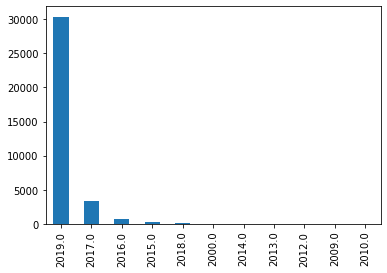

In [25]:
median = yr_capacity_data.median()
yr_capacity_data.fillna(median,inplace=True)
yr_capacity_data.value_counts().plot(kind='bar')


In [10]:
energy.primary_fuel.value_counts()

Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: primary_fuel, dtype: int64

In [6]:
#4. Replace the missing values of a numeric series with the median value.
np.clip(energy.capacity_mw,a_min=energy.capacity_mw.quantile(0.05),a_max=energy.capacity_mw.quantile(0.95))

0         33.0
1         10.0
2         10.0
3         66.0
4        100.0
         ...  
34931     50.0
34932     20.0
34933    108.0
34934    903.9
34935    750.0
Name: capacity_mw, Length: 34936, dtype: float64

In [11]:
#Using a categorical column, replace any value that is not in the top 5 most frequent values with 'Other'
top_5 = energy.primary_fuel.value_counts().index[:5]
(energy
.primary_fuel
.where(energy.primary_fuel.isin(top_5),'Other')
)

0        Hydro
1        Solar
2        Solar
3        Hydro
4        Hydro
         ...  
34931    Other
34932    Other
34933    Hydro
34934     Coal
34935    Hydro
Name: primary_fuel, Length: 34936, dtype: object

In [30]:
#Make a function that takes a categorical series and a number (n) and returns a replace series that replaces any value that is not in the top n most frequent values with 'Other'.
def generalize_top5(series, n):
    top_n = series.value_counts().index[:n]
    return series.where(series.isin(top_n),'Other')



In [31]:
generalize_top5(energy.primary_fuel,5)

0        Hydro
1        Solar
2        Solar
3        Hydro
4        Hydro
         ...  
34931    Other
34932    Other
34933    Hydro
34934     Coal
34935    Hydro
Name: primary_fuel, Length: 34936, dtype: object

In [36]:
#9. Using a numeric column, bin it into 10 groups that have the same width.

pd.cut(energy.capacity_mw,bins=10).value_counts()

(-21.499, 2250.9]     34558
(2250.9, 4500.8]        330
(4500.8, 6750.7]         36
(6750.7, 9000.6]          9
(11250.5, 13500.4]        2
(20250.1, 22500.0]        1
(9000.6, 11250.5]         0
(13500.4, 15750.3]        0
(15750.3, 18000.2]        0
(18000.2, 20250.1]        0
Name: capacity_mw, dtype: int64

In [40]:
#10. Using a numeric column, bin it into 10 groups that have equal sized bins.
pd.qcut(energy.capacity_mw,q=10).value_counts()

(5.5, 10.0]         4081
(29.064, 50.0]      3728
(1.815, 3.6]        3609
(0.999, 1.815]      3494
(16.745, 29.064]    3494
(433.6, 22500.0]    3494
(119.0, 433.6]      3490
(3.6, 5.5]          3387
(50.0, 119.0]       3262
(10.0, 16.745]      2897
Name: capacity_mw, dtype: int64